In [2]:
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import torch

from OkadaTorch import OkadaWrapper
okada = OkadaWrapper()

var_list = [
    "ux", "uy", "uz", "uxx", "uyx", "uzx", "uxy", "uyy", "uzy", "uxz", "uyz", "uzz"
]

# point source

In [3]:
# domain
lon_min, lon_max = 142, 148
lat_min, lat_max = 37, 43
dlon, dlat = 0.05, 0.05
nlon, nlat = int((lon_max-lon_min)/dlon)+1, int((lat_max-lat_min)/dlon)+1


# coordinate transformation
pj_tmerc = f"+proj=tmerc +lon_0={(lon_min+lon_max)/2} +k=1.00010001 +ellps=WGS84 +datum=WGS84 +no_defs"
pj_latlong = "+proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs"
ll2xy = pyproj.Transformer.from_proj(pj_latlong, pj_tmerc, always_xy=True)

lon = np.linspace(lon_min, lon_max, nlon)
lat = np.linspace(lat_min, lat_max, nlat)
Lon, Lat = np.meshgrid(lon, lat)
x, y = ll2xy.transform(Lon, Lat)
X = torch.from_numpy(x/1e3) # km
Y = torch.from_numpy(y/1e3) # km


# source parameters
lat_ref = 40.2224
lon_ref = 144.8678
x_ref, y_ref = ll2xy.transform(lon_ref, lat_ref)

x_ref = torch.tensor(x_ref/1e3) # km
y_ref = torch.tensor(y_ref/1e3) # km
depth = 0.1
dip = torch.tensor(60.0)
strike = torch.tensor(189.0)
rake = torch.tensor(270.0)
slip = torch.tensor(5.62*1e4) # just amplify

## `z` is not given (`SPOINT` is called)

In [4]:
coords = {
    "x": X,
    "y": Y
}
params = {
    "x_ref": x_ref,
    "y_ref": y_ref,
    "depth": depth,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

out = okada.compute(coords, params, True, True)
out

[tensor([[-0.0127, -0.0126, -0.0124,  ...,  0.0233,  0.0234,  0.0234],
         [-0.0133, -0.0131, -0.0129,  ...,  0.0241,  0.0242,  0.0242],
         [-0.0139, -0.0137, -0.0135,  ...,  0.0249,  0.0250,  0.0250],
         ...,
         [-0.0321, -0.0320, -0.0319,  ...,  0.0189,  0.0191,  0.0192],
         [-0.0308, -0.0308, -0.0307,  ...,  0.0181,  0.0182,  0.0183],
         [-0.0296, -0.0296, -0.0295,  ...,  0.0173,  0.0174,  0.0175]],
        dtype=torch.float64),
 tensor([[-0.0036, -0.0035, -0.0035,  ..., -0.0144, -0.0144, -0.0143],
         [-0.0038, -0.0037, -0.0036,  ..., -0.0149, -0.0148, -0.0148],
         [-0.0040, -0.0039, -0.0038,  ..., -0.0153, -0.0152, -0.0152],
         ...,
         [ 0.0197,  0.0198,  0.0199,  ...,  0.0056,  0.0056,  0.0056],
         [ 0.0191,  0.0192,  0.0193,  ...,  0.0053,  0.0053,  0.0054],
         [ 0.0185,  0.0186,  0.0186,  ...,  0.0050,  0.0051,  0.0051]],
        dtype=torch.float64),
 tensor([[ 0.0060,  0.0062,  0.0064,  ..., -0.0004, -0.000

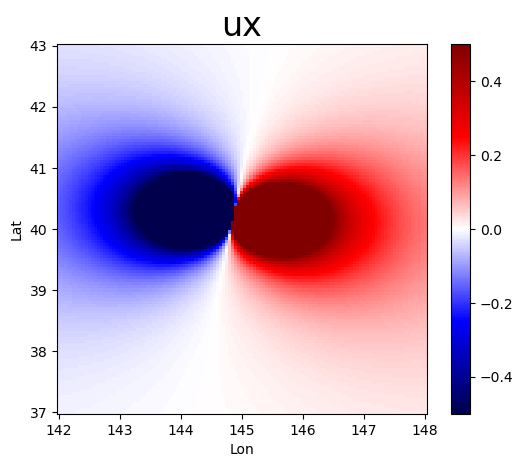

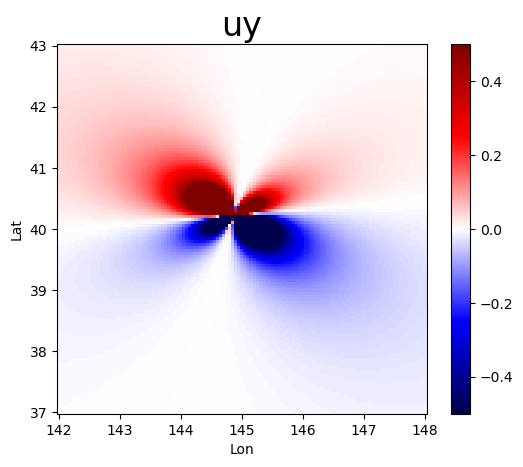

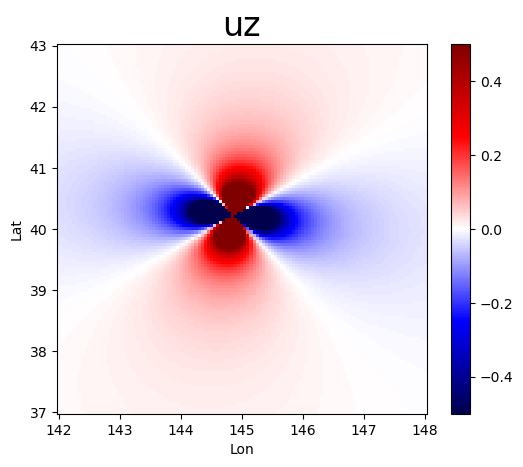

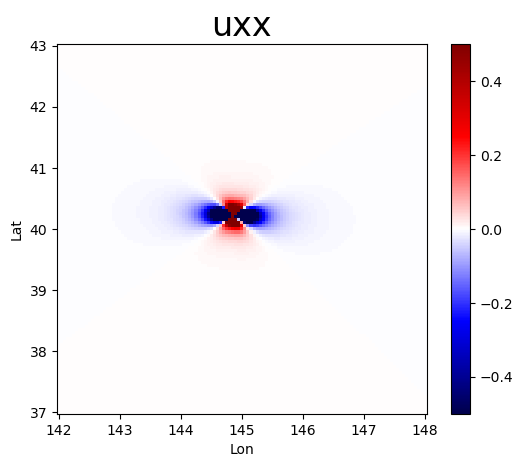

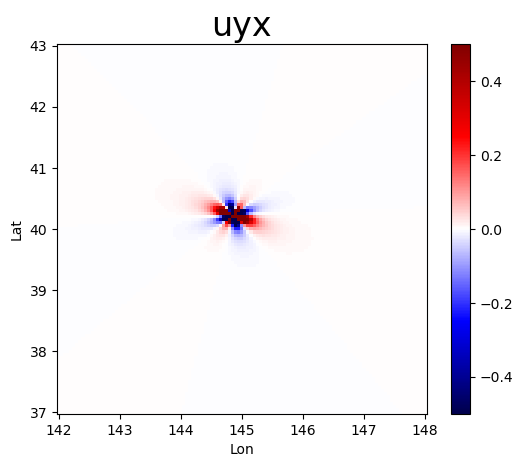

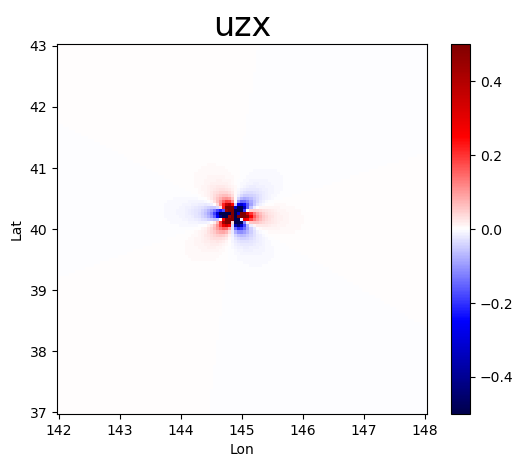

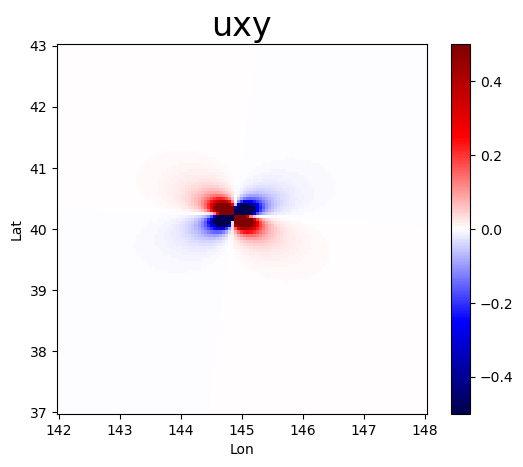

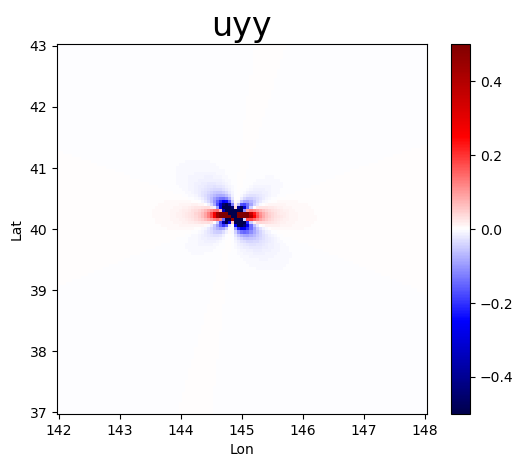

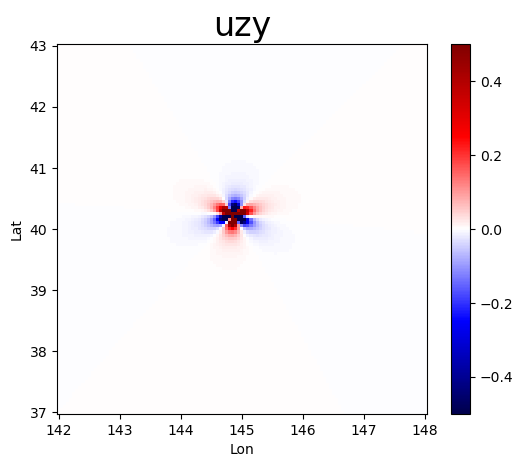

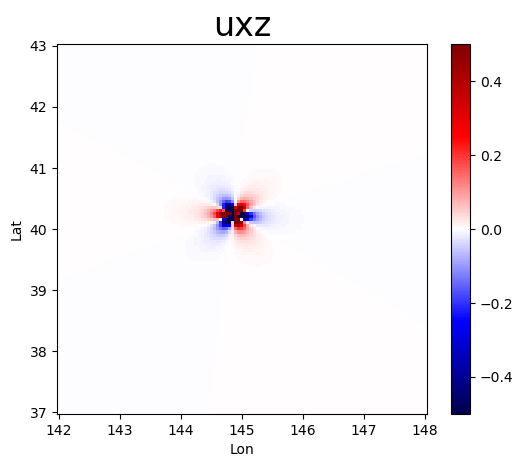

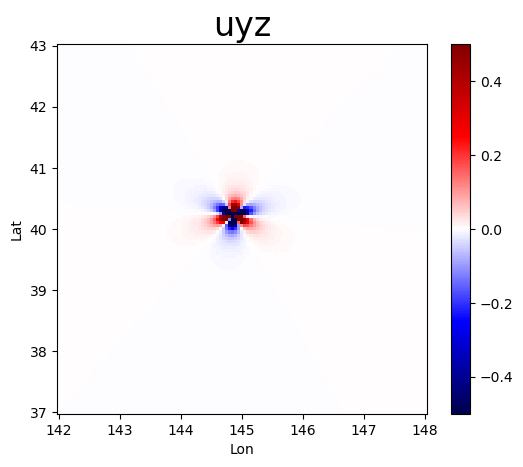

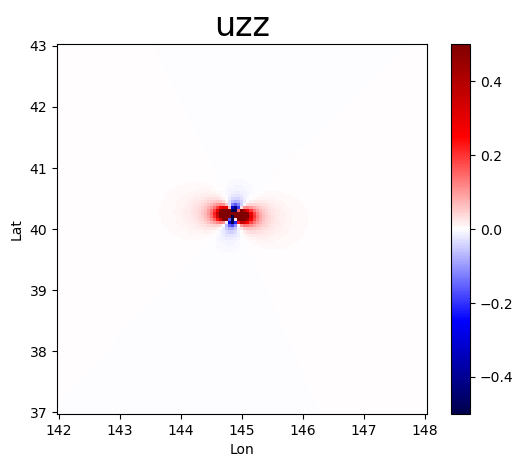

In [5]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="seismic", vmin=-0.5, vmax=0.5)
    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=24)
    fig.colorbar(im)
    fig.show()

## `z` is given (`DC3D0` is called)

In [6]:
z = np.zeros_like(x)
Z = torch.from_numpy(z)

coords = {
    "x": X,
    "y": Y,
    "z": Z
}
params = {
    "x_ref": x_ref,
    "y_ref": y_ref,
    "depth": depth,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

out = okada.compute(coords, params, True, True)
out

[tensor([[-0.0127, -0.0126, -0.0124,  ...,  0.0233,  0.0234,  0.0234],
         [-0.0133, -0.0131, -0.0129,  ...,  0.0241,  0.0242,  0.0242],
         [-0.0139, -0.0137, -0.0135,  ...,  0.0249,  0.0250,  0.0250],
         ...,
         [-0.0321, -0.0320, -0.0319,  ...,  0.0189,  0.0191,  0.0192],
         [-0.0308, -0.0308, -0.0307,  ...,  0.0181,  0.0182,  0.0183],
         [-0.0296, -0.0296, -0.0295,  ...,  0.0173,  0.0174,  0.0175]],
        dtype=torch.float64),
 tensor([[-0.0036, -0.0035, -0.0035,  ..., -0.0144, -0.0144, -0.0143],
         [-0.0038, -0.0037, -0.0036,  ..., -0.0149, -0.0148, -0.0148],
         [-0.0040, -0.0039, -0.0038,  ..., -0.0153, -0.0152, -0.0152],
         ...,
         [ 0.0197,  0.0198,  0.0199,  ...,  0.0056,  0.0056,  0.0056],
         [ 0.0191,  0.0192,  0.0193,  ...,  0.0053,  0.0053,  0.0054],
         [ 0.0185,  0.0186,  0.0186,  ...,  0.0050,  0.0051,  0.0051]],
        dtype=torch.float64),
 tensor([[ 0.0060,  0.0062,  0.0064,  ..., -0.0004, -0.000

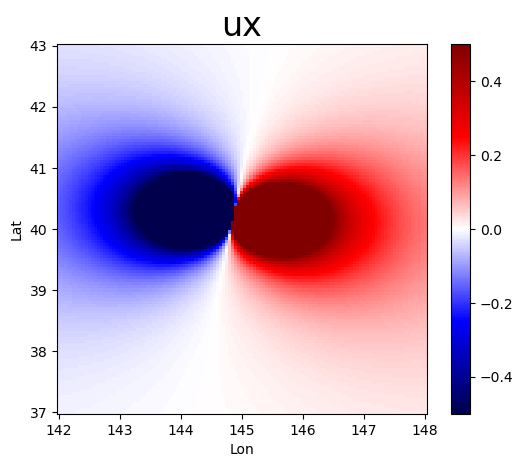

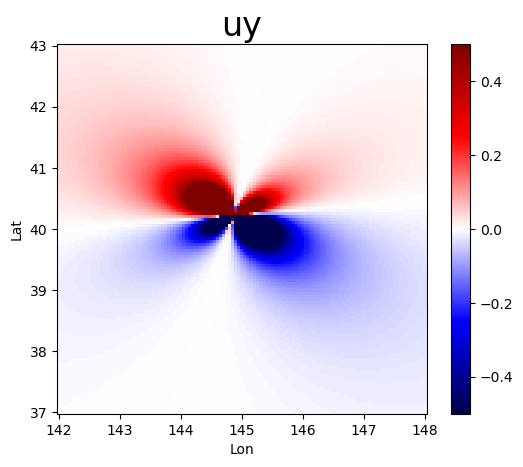

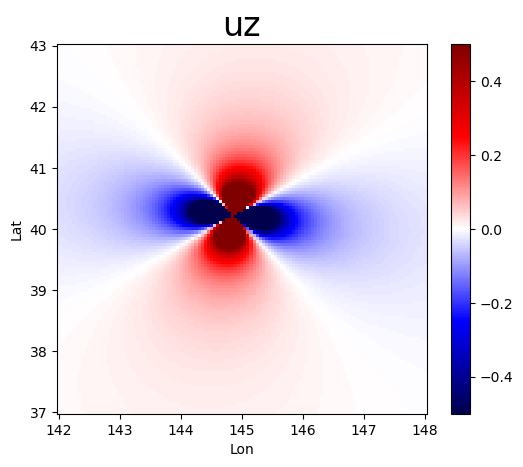

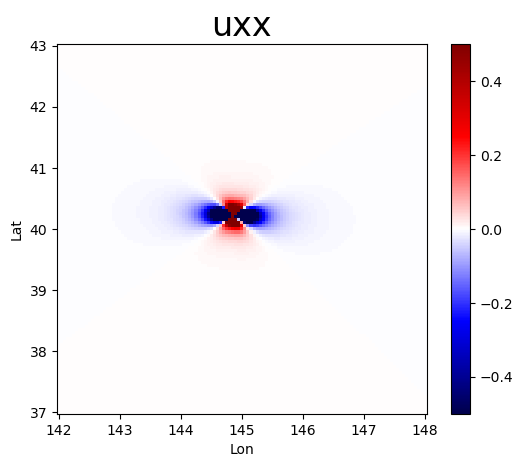

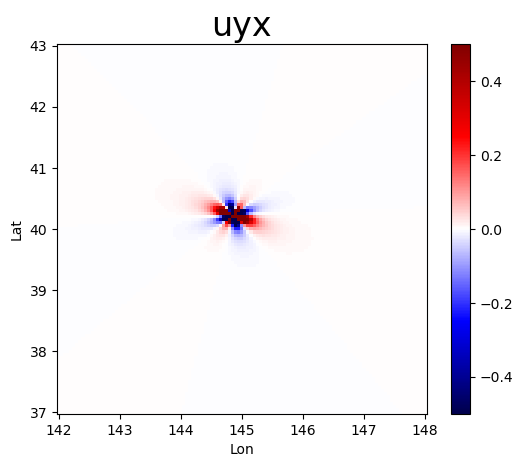

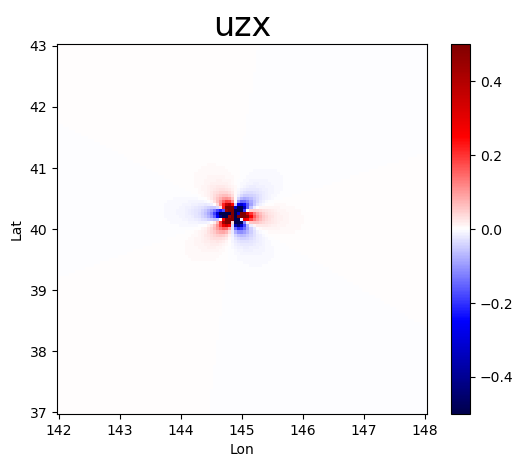

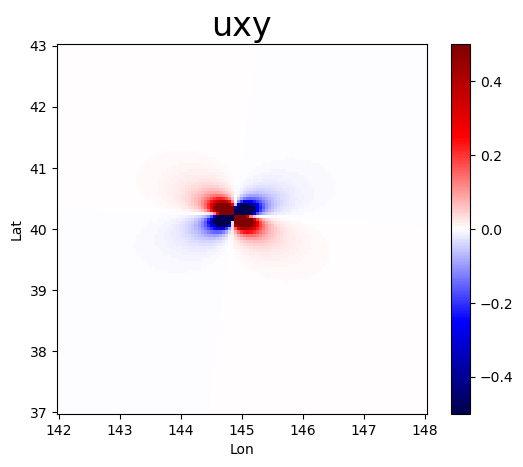

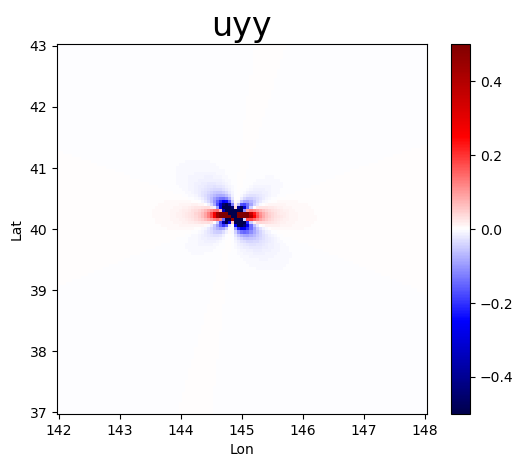

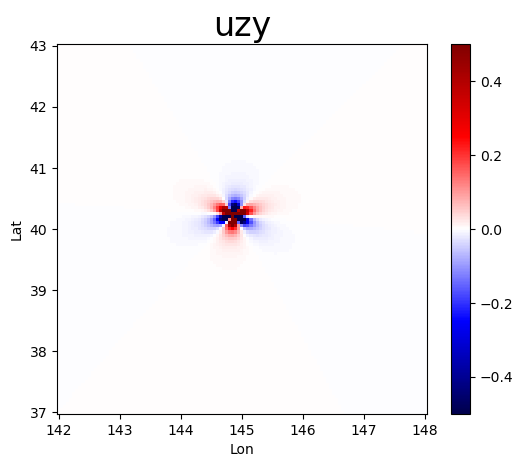

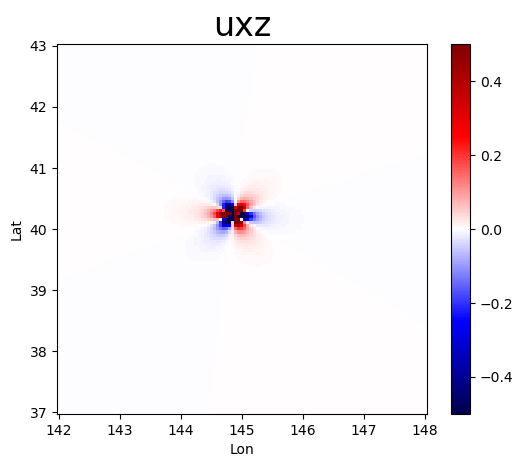

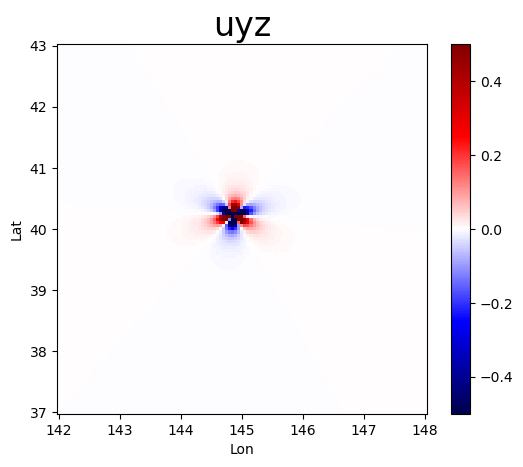

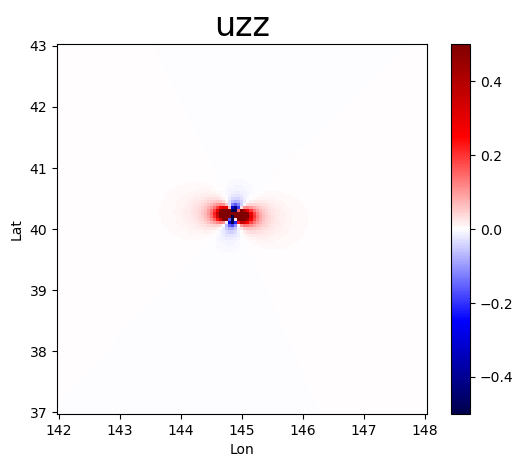

In [7]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="seismic", vmin=-0.5, vmax=0.5)
    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=24)
    fig.colorbar(im)
    fig.show()

# rectangular fault

In [8]:
# domain
lon_min, lon_max = 142, 148
lat_min, lat_max = 37, 43
dlon, dlat = 0.05, 0.05
nlon, nlat = int((lon_max-lon_min)/dlon)+1, int((lat_max-lat_min)/dlon)+1


# coordinate transformation
pj_tmerc = f"+proj=tmerc +lon_0={(lon_min+lon_max)/2} +k=1.00010001 +ellps=WGS84 +datum=WGS84 +no_defs"
pj_latlong = "+proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs"
ll2xy = pyproj.Transformer.from_proj(pj_latlong, pj_tmerc, always_xy=True)

lon = np.linspace(lon_min, lon_max, nlon)
lat = np.linspace(lat_min, lat_max, nlat)
Lon, Lat = np.meshgrid(lon, lat)
x, y = ll2xy.transform(Lon, Lat)
X = torch.from_numpy(x/1e3) # km
Y = torch.from_numpy(y/1e3) # km


# source parameters
lat_ref = 40.2224
lon_ref = 144.8678
x_ref, y_ref = ll2xy.transform(lon_ref, lat_ref)

x_ref = torch.tensor(x_ref/1e3) # km
y_ref = torch.tensor(y_ref/1e3) # km
depth, length, width = 0.1, 218.0, 46.0 # km
dip = torch.tensor(60.0)
strike = torch.tensor(189.0)
rake = torch.tensor(270.0)
slip = torch.tensor(5.62)

## `z` is not given (`SRECTF` is called)

In [9]:
coords = {
    "x": X,
    "y": Y
}
params = {
    "x_ref": x_ref,
    "y_ref": y_ref,
    "depth": depth,
    "length": length,
    "width": width,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

out = okada.compute(coords, params, True, True)
out

[tensor([[-0.0294, -0.0292, -0.0290,  ...,  0.0479,  0.0475,  0.0470],
         [-0.0310, -0.0308, -0.0306,  ...,  0.0495,  0.0490,  0.0485],
         [-0.0327, -0.0326, -0.0324,  ...,  0.0511,  0.0505,  0.0500],
         ...,
         [-0.0148, -0.0147, -0.0145,  ...,  0.0101,  0.0102,  0.0103],
         [-0.0143, -0.0142, -0.0140,  ...,  0.0096,  0.0098,  0.0099],
         [-0.0138, -0.0137, -0.0135,  ...,  0.0093,  0.0094,  0.0095]],
        dtype=torch.float64),
 tensor([[-0.0068, -0.0067, -0.0066,  ..., -0.0239, -0.0234, -0.0230],
         [-0.0072, -0.0071, -0.0070,  ..., -0.0243, -0.0238, -0.0233],
         [-0.0075, -0.0075, -0.0074,  ..., -0.0246, -0.0241, -0.0237],
         ...,
         [ 0.0094,  0.0093,  0.0092,  ...,  0.0036,  0.0036,  0.0037],
         [ 0.0091,  0.0090,  0.0089,  ...,  0.0034,  0.0035,  0.0035],
         [ 0.0088,  0.0087,  0.0086,  ...,  0.0033,  0.0033,  0.0034]],
        dtype=torch.float64),
 tensor([[ 0.0062,  0.0066,  0.0070,  ..., -0.0032, -0.003

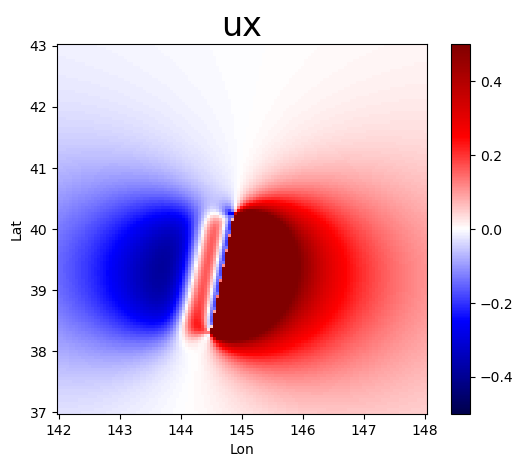

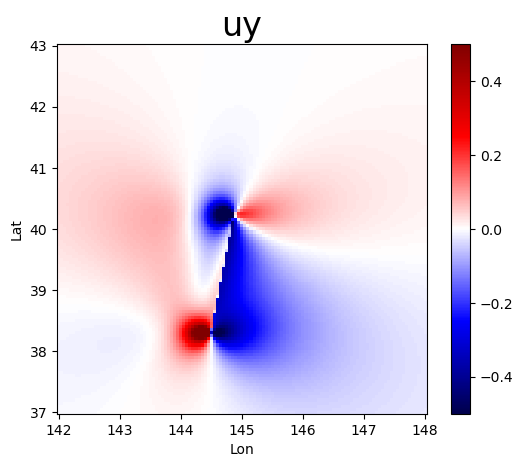

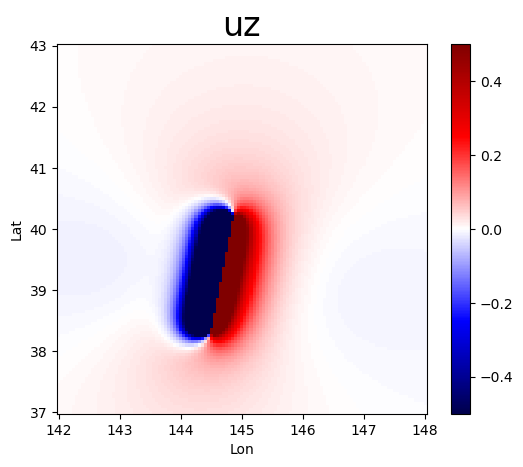

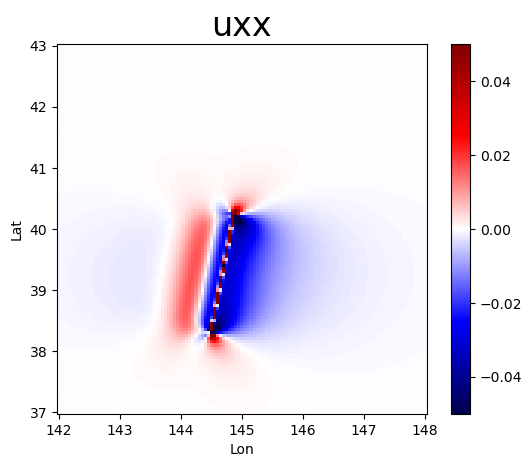

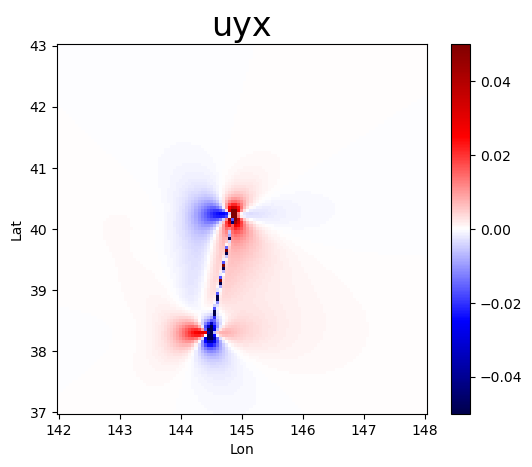

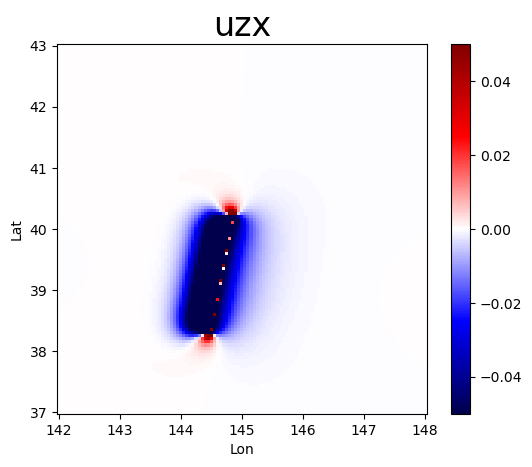

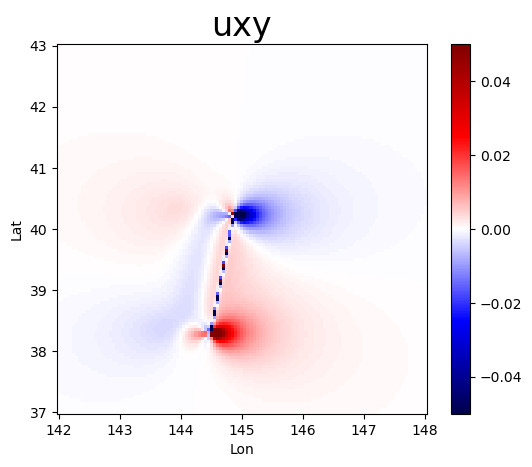

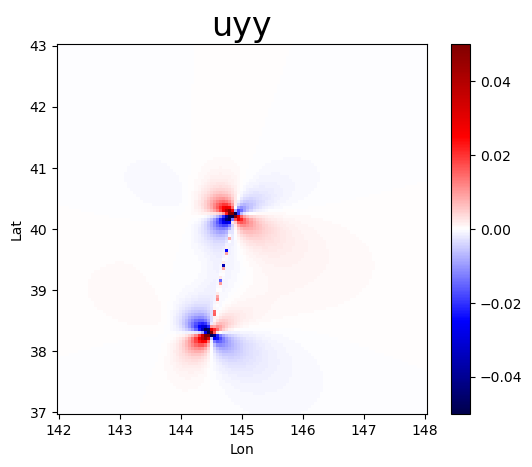

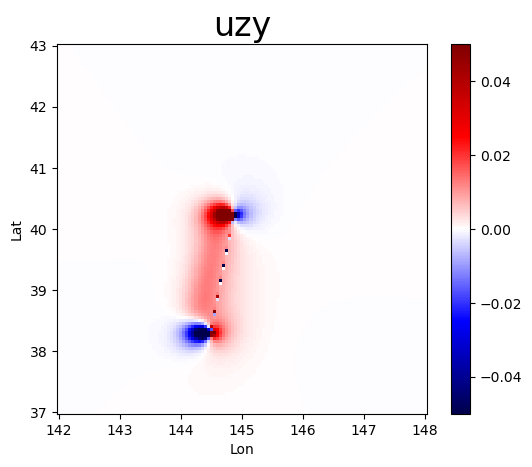

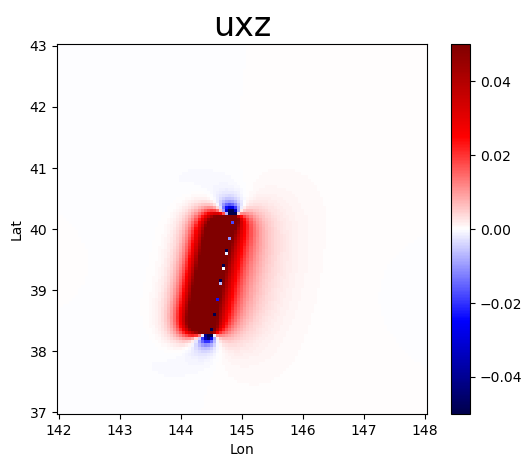

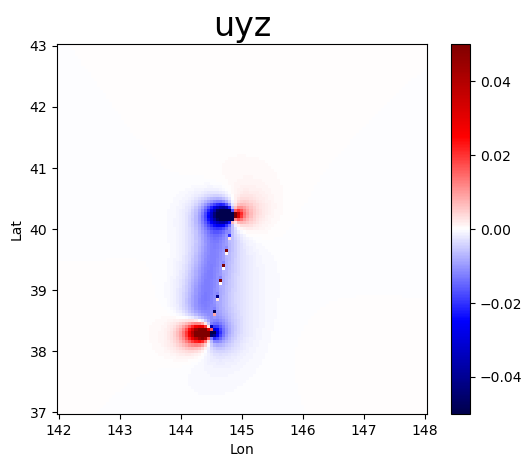

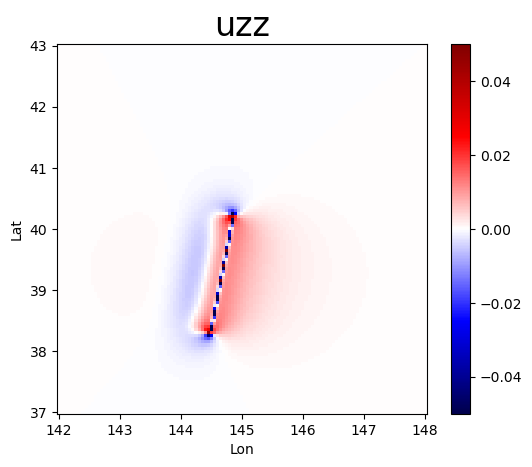

In [ ]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    if i<3:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="seismic", vmin=-0.5, vmax=0.5)
    else:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="seismic", vmin=-0.05, vmax=0.05)

    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=24)
    fig.colorbar(im)
    fig.show()

## `z` is given (`DC3D` is called)

In [13]:
z = np.zeros_like(x)
Z = torch.from_numpy(z)

coords = {
    "x": X,
    "y": Y,
    "z": Z
}
params = {
    "x_ref": x_ref,
    "y_ref": y_ref,
    "depth": depth,
    "length": length,
    "width": width,
    "strike": strike,
    "dip": dip,
    "rake": rake,
    "slip": slip
}

out = okada.compute(coords, params, True, True)
out

[tensor([[-0.0294, -0.0292, -0.0290,  ...,  0.0479,  0.0475,  0.0470],
         [-0.0310, -0.0308, -0.0306,  ...,  0.0495,  0.0490,  0.0485],
         [-0.0327, -0.0326, -0.0324,  ...,  0.0511,  0.0505,  0.0500],
         ...,
         [-0.0148, -0.0147, -0.0145,  ...,  0.0101,  0.0102,  0.0103],
         [-0.0143, -0.0142, -0.0140,  ...,  0.0096,  0.0098,  0.0099],
         [-0.0138, -0.0137, -0.0135,  ...,  0.0093,  0.0094,  0.0095]],
        dtype=torch.float64),
 tensor([[-0.0068, -0.0067, -0.0066,  ..., -0.0239, -0.0234, -0.0230],
         [-0.0072, -0.0071, -0.0070,  ..., -0.0243, -0.0238, -0.0233],
         [-0.0075, -0.0075, -0.0074,  ..., -0.0246, -0.0241, -0.0237],
         ...,
         [ 0.0094,  0.0093,  0.0092,  ...,  0.0036,  0.0036,  0.0037],
         [ 0.0091,  0.0090,  0.0089,  ...,  0.0034,  0.0035,  0.0035],
         [ 0.0088,  0.0087,  0.0086,  ...,  0.0033,  0.0033,  0.0034]],
        dtype=torch.float64),
 tensor([[ 0.0062,  0.0066,  0.0070,  ..., -0.0032, -0.003

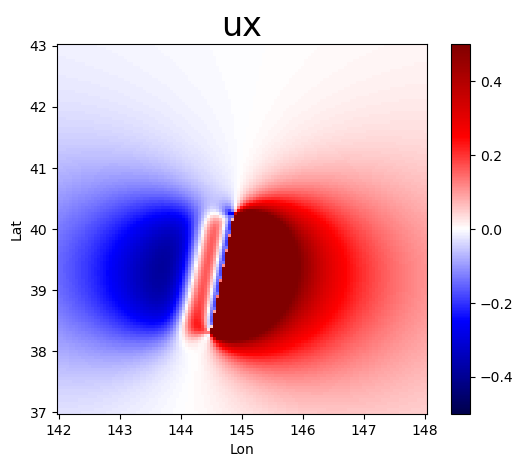

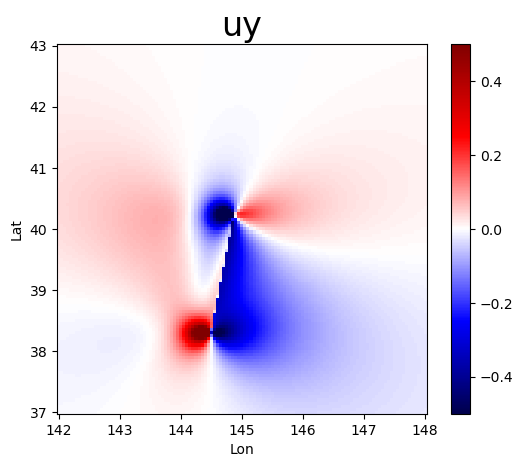

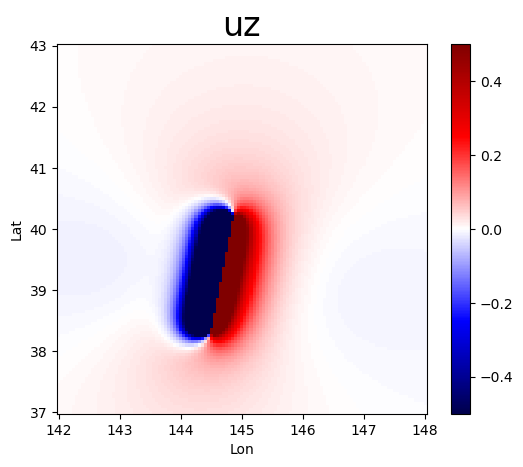

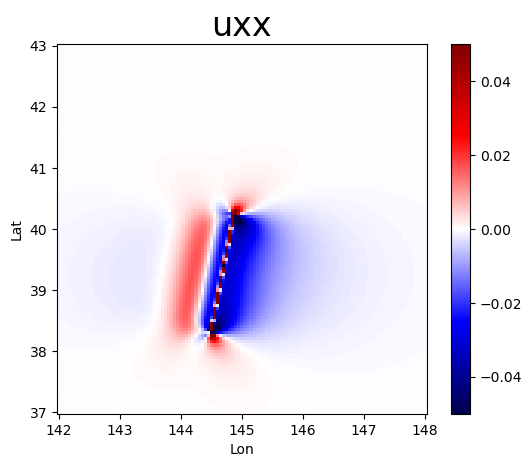

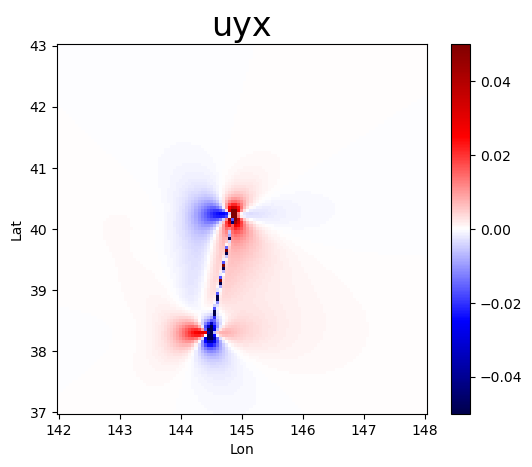

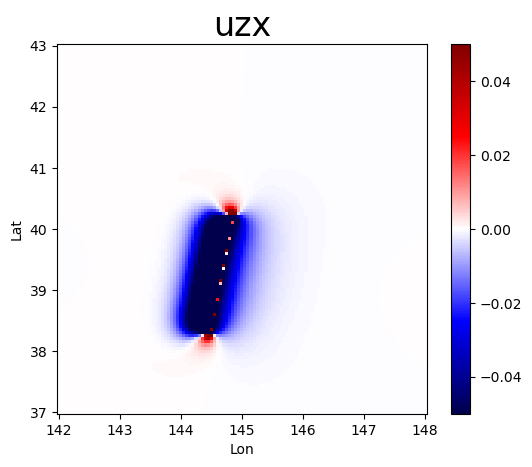

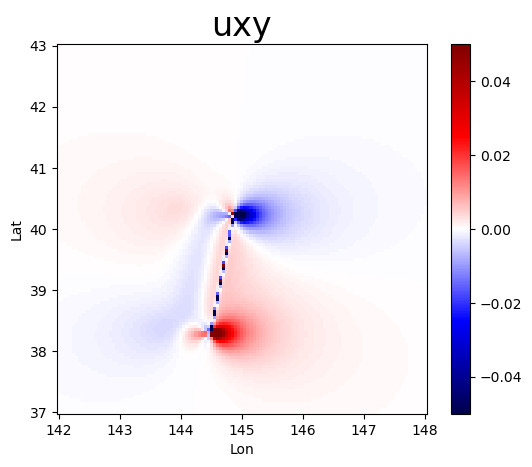

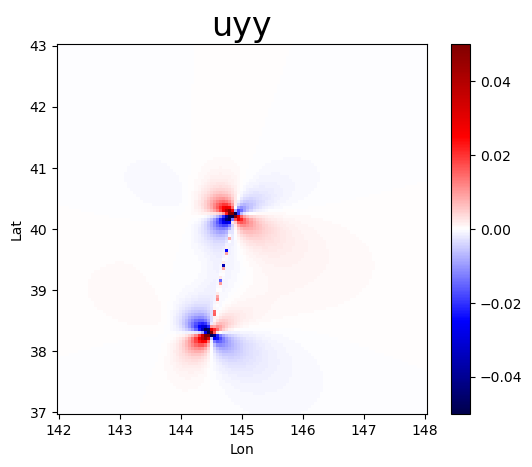

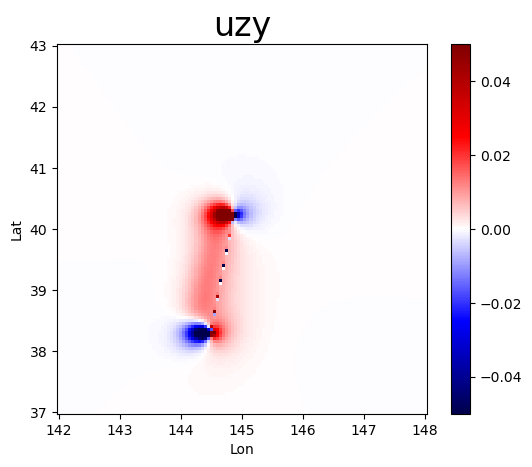

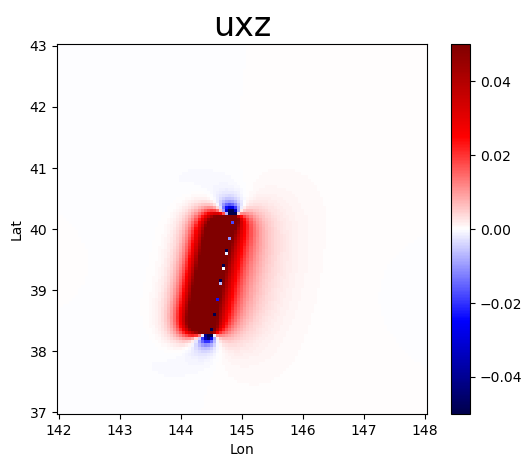

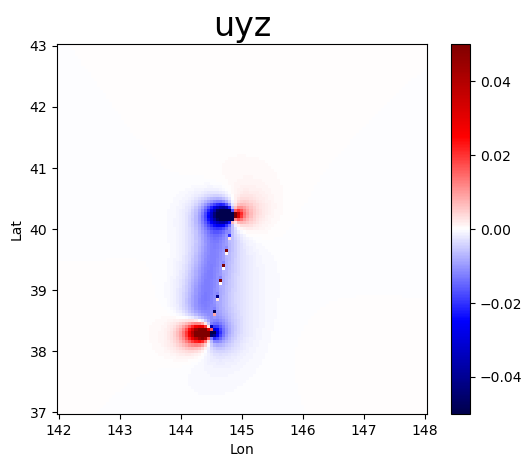

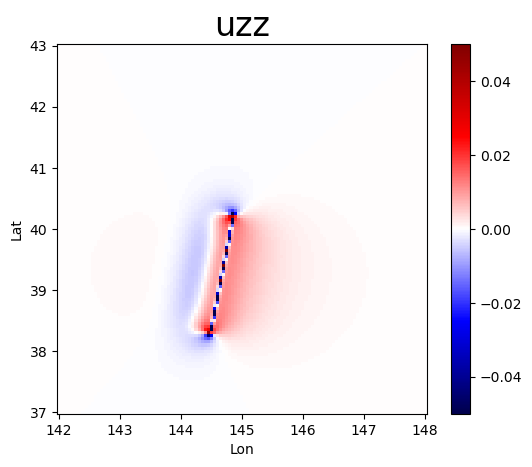

In [14]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    if i<3:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="seismic", vmin=-0.5, vmax=0.5)
    else:
        im = ax.pcolormesh(Lon, Lat, out[i].detach().numpy(), cmap="seismic", vmin=-0.05, vmax=0.05)

    ax.set_aspect("equal")
    ax.set_xlabel("Lon")
    ax.set_ylabel("Lat")
    ax.set_title(var, fontsize=24)
    fig.colorbar(im)
    fig.show()